# Concept Labeling Calibration: 8 Example Windows

## 📋 Purpose

This notebook provides **8 example windows** with detailed labeling reasoning for team calibration.

**These are REAL examples with ACTUAL labels from iteration1 data!**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
print("✓ Imports loaded")

✓ Imports loaded


In [ ]:
# Load data
df_windows = pd.read_csv('concept_labeling_outputs/iteration1/merged_window_labels.csv')
df_sensor = pd.read_csv('concept_labeling_outputs/iteration1/merged_dataset_with_concepts.csv')

print(f"✓ Loaded {len(df_windows)} windows")
print(f"✓ Loaded {len(df_sensor)} sensor readings")

EXAMPLE_WINDOWS = [0, 4, 9, 12, 18, 20, 25, 1]
print(f"\n✓ Calibration windows: {EXAMPLE_WINDOWS}")

✓ Loaded 100 windows
✓ Loaded 5702 sensor readings

✓ Calibration windows: [0, 4, 8, 12, 18, 20, 25, 1]


In [14]:
def plot_window(window_idx, df_windows, df_sensor):
    window = df_windows.iloc[window_idx]
    user = window['user']
    activity = window['activity']
    start_time = window['start_time']
    end_time = window['end_time']
    
    user_data = df_sensor[df_sensor['user'] == user].copy()
    window_data = user_data[
        (user_data['time_s'] >= start_time) & 
        (user_data['time_s'] <= end_time)
    ].copy()
    
    if len(window_data) == 0:
        print(f"⚠️ No data found for window {window_idx}")
        return
    
    # 3 separate plots
    fig, axes = plt.subplots(3, 1, figsize=(14, 8), sharex=True)
    fig.suptitle(f"Window {window_idx} | {activity} (User {user})", fontsize=16, fontweight='bold')
    
    axes[0].plot(window_data['time_s'], window_data['x-axis'], 'b-', linewidth=1.5)
    axes[0].set_ylabel('X-axis', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_title('X-axis Acceleration', fontsize=11)
    
    axes[1].plot(window_data['time_s'], window_data['y-axis'], 'g-', linewidth=1.5)
    axes[1].set_ylabel('Y-axis', fontsize=12)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_title('Y-axis Acceleration', fontsize=11)
    
    axes[2].plot(window_data['time_s'], window_data['z-axis'], 'r-', linewidth=1.5)
    axes[2].set_ylabel('Z-axis', fontsize=12)
    axes[2].set_xlabel('Time (s)', fontsize=12)
    axes[2].grid(True, alpha=0.3)
    axes[2].set_title('Z-axis Acceleration', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # Combined plot
    fig2, ax = plt.subplots(1, 1, figsize=(14, 5))
    ax.plot(window_data['time_s'], window_data['x-axis'], 'b-', label='X-axis', alpha=0.7, linewidth=1.5)
    ax.plot(window_data['time_s'], window_data['y-axis'], 'g-', label='Y-axis', alpha=0.7, linewidth=1.5)
    ax.plot(window_data['time_s'], window_data['z-axis'], 'r-', label='Z-axis', alpha=0.7, linewidth=1.5)
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel('Acceleration', fontsize=12)
    ax.set_title('Combined View - All Axes', fontsize=14)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Window Info:")
    print(f"  User: {user} | Activity: {activity}")
    print(f"  Time: {start_time:.2f}s → {end_time:.2f}s")
    print(f"  Duration: {end_time - start_time:.2f}s")
    print(f"  Samples: {len(window_data)} readings")
    print(f"\n🏷️  Your labels: Periodicity=___, Stability=___, Coordination=___")

print("✓ Plot function defined")

✓ Plot function defined


---

## Quick Concept Definitions

### Periodicity: **1.0** = Clear cycles, **0.5** = Some pattern, **0.0** = No pattern
### Temporal Stability: **1.0** = Constant signal, **0.5** = Moderate changes, **0.0** = Rapid changes
### Coordination: **1.0** = All axes synchronized, **0.5** = Partial sync, **0.0** = Independent axes

---

# Example 1: Walking (Window 0, User 3)

**⚠️ Label this window BEFORE reading the reasoning below!**

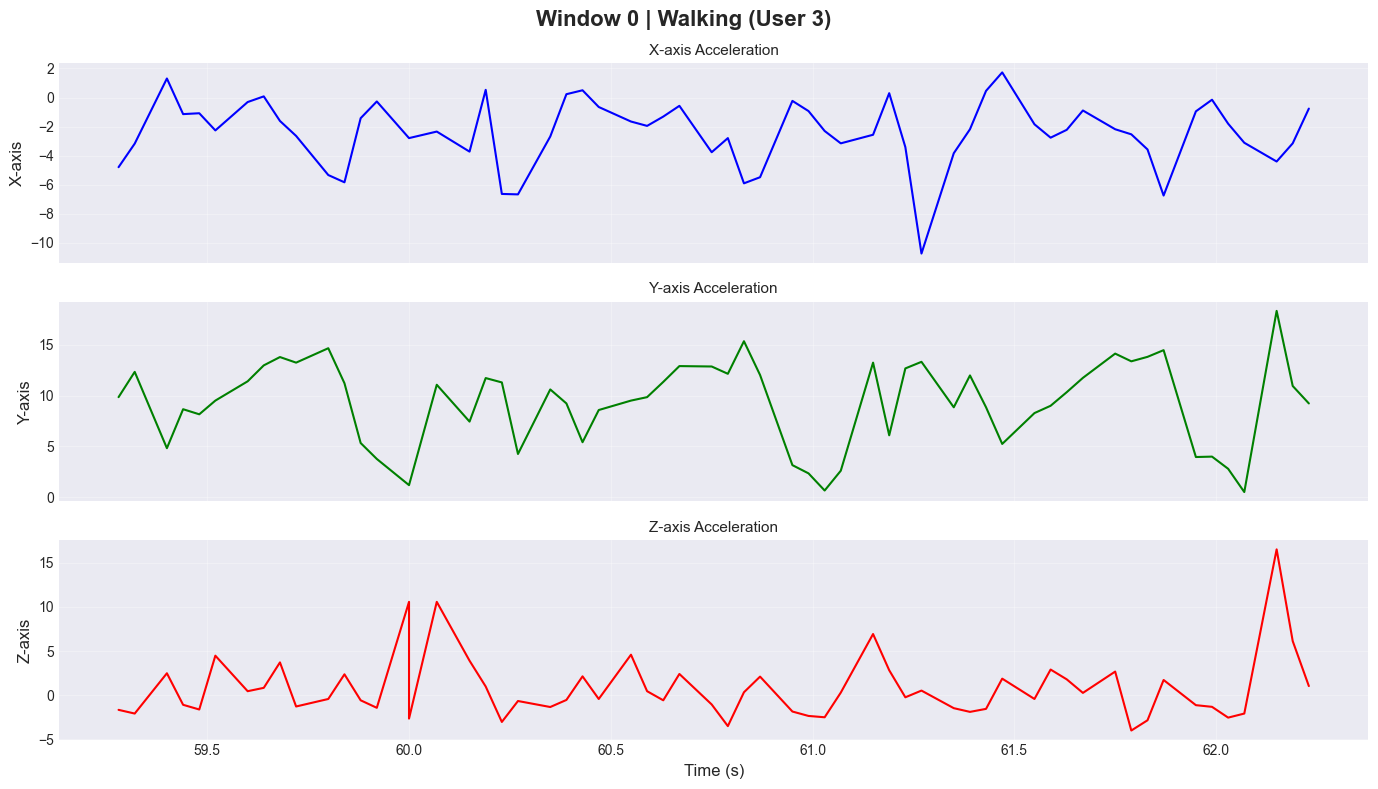

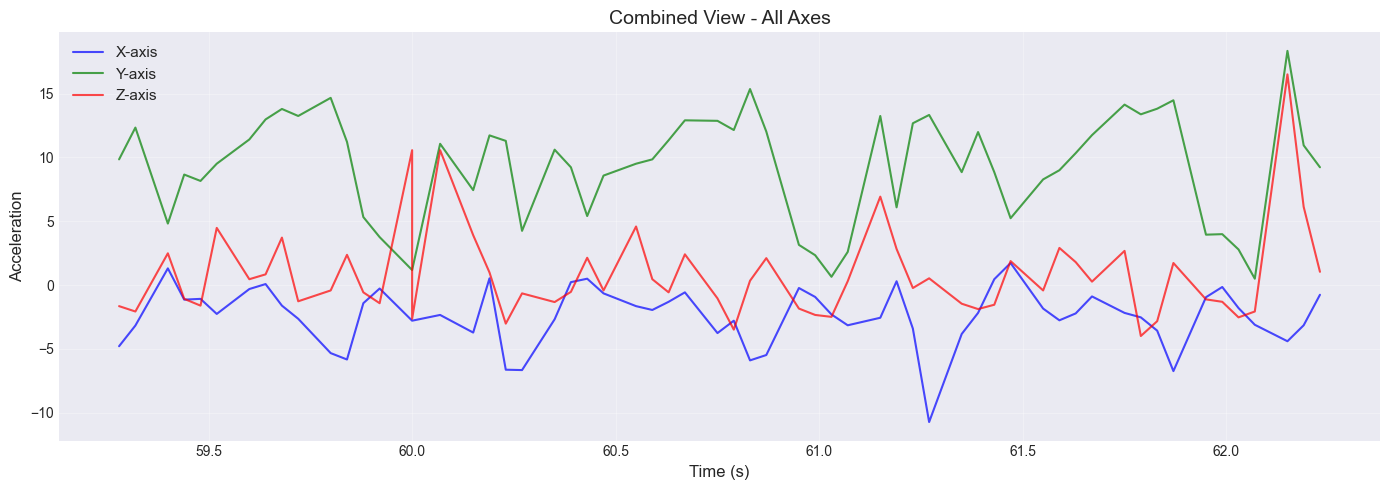


📊 Window Info:
  User: 3 | Activity: Walking
  Time: 59.25s → 62.25s
  Duration: 3.00s
  Samples: 60 readings

🏷️  Your labels: Periodicity=___, Stability=___, Coordination=___


In [15]:
plot_window(0, df_windows, df_sensor)

## 📊 My Labels (from iteration1 data)
```
Periodicity:        0.5
Temporal Stability: 0.5
Coordination:       0.5
```

## 💭 Reasoning

**Periodicity (0.5)**: Moderate pattern with ~2 walking cycles, but amplitude varies. Not perfectly consistent.

**Temporal Stability (0.5)**: Moderate oscillations within stable envelope. No sudden transitions but not constant.

**Coordination (0.5)**: Y-axis dominates rhythm, X and Z partially follow. Some but not strong coordination.

### 🔍 Note
**BASELINE WALKING**: Use this as reference for medium (0.5) values across all concepts.

---

# Example 2: Jogging (Window 4, User 3)

**⚠️ Label this window BEFORE reading the reasoning below!**

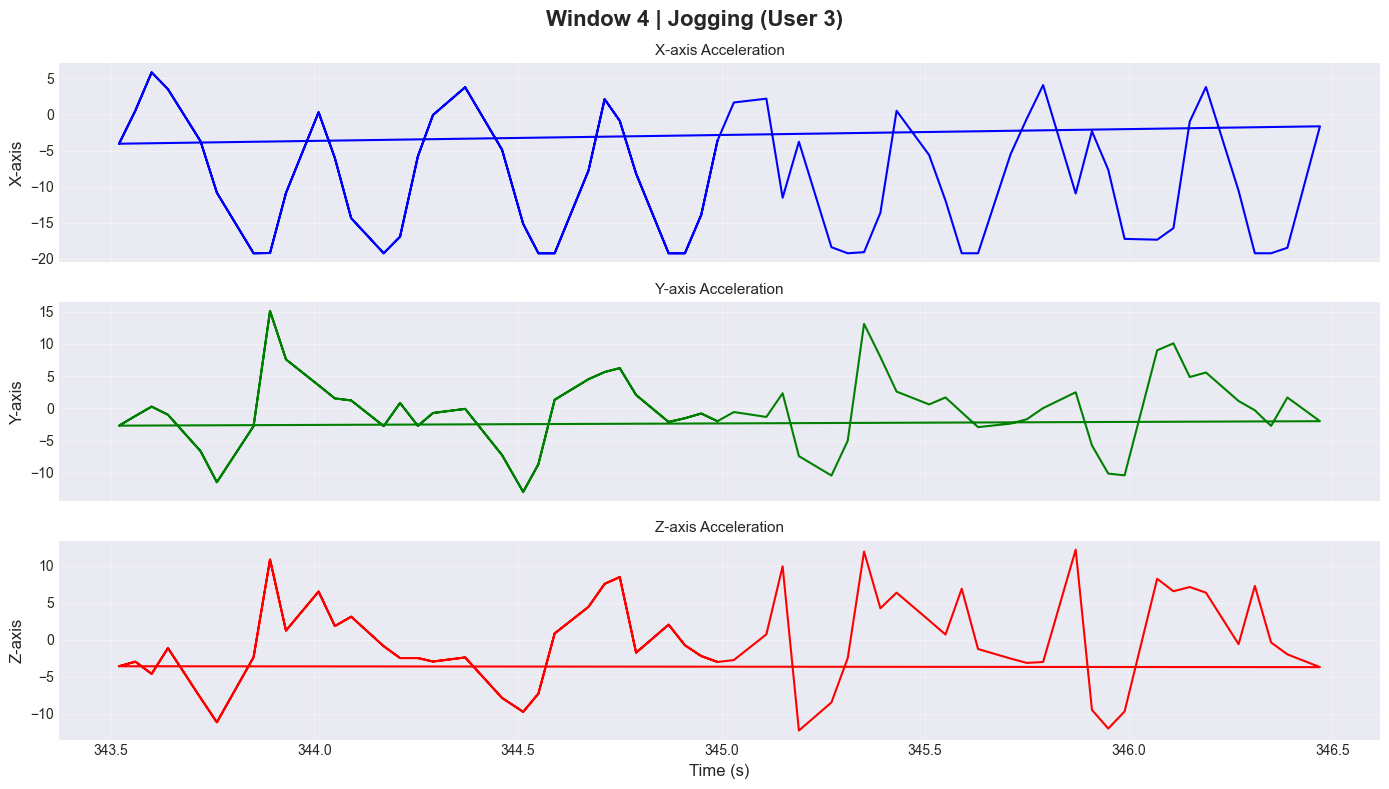

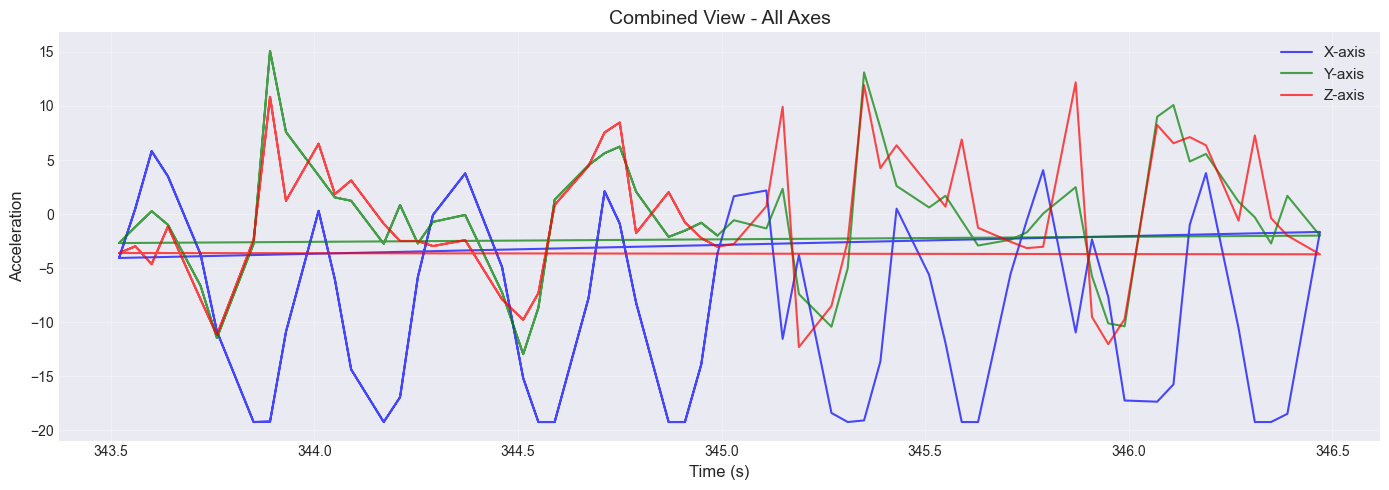


📊 Window Info:
  User: 3 | Activity: Jogging
  Time: 343.50s → 346.50s
  Duration: 3.00s
  Samples: 91 readings

🏷️  Your labels: Periodicity=___, Stability=___, Coordination=___


In [16]:
plot_window(4, df_windows, df_sensor)

## 📊 My Labels (from iteration1 data)
```
Periodicity:        1.0
Temporal Stability: 0.0
Coordination:       1.0
```

## 💭 Reasoning

**Periodicity (1.0)**: Clear ~4-5 jogging cycles at ~1.5 Hz. Strong periodic pattern in all axes.

**Temporal Stability (0.0)**: High amplitude swings with each step. Jogging involves rapid acceleration/deceleration cycles.

**Coordination (1.0)**: All axes synchronized at same frequency. Y peaks (foot impact) trigger predictable X/Z responses.

### 🔍 Note
**KEY INSIGHT**: High periodicity (1.0) + Low stability (0.0). Periodic ≠ Stable!

---

# Example 3: Sitting (Window 9, User 3)

**⚠️ Label this window BEFORE reading the reasoning below!**

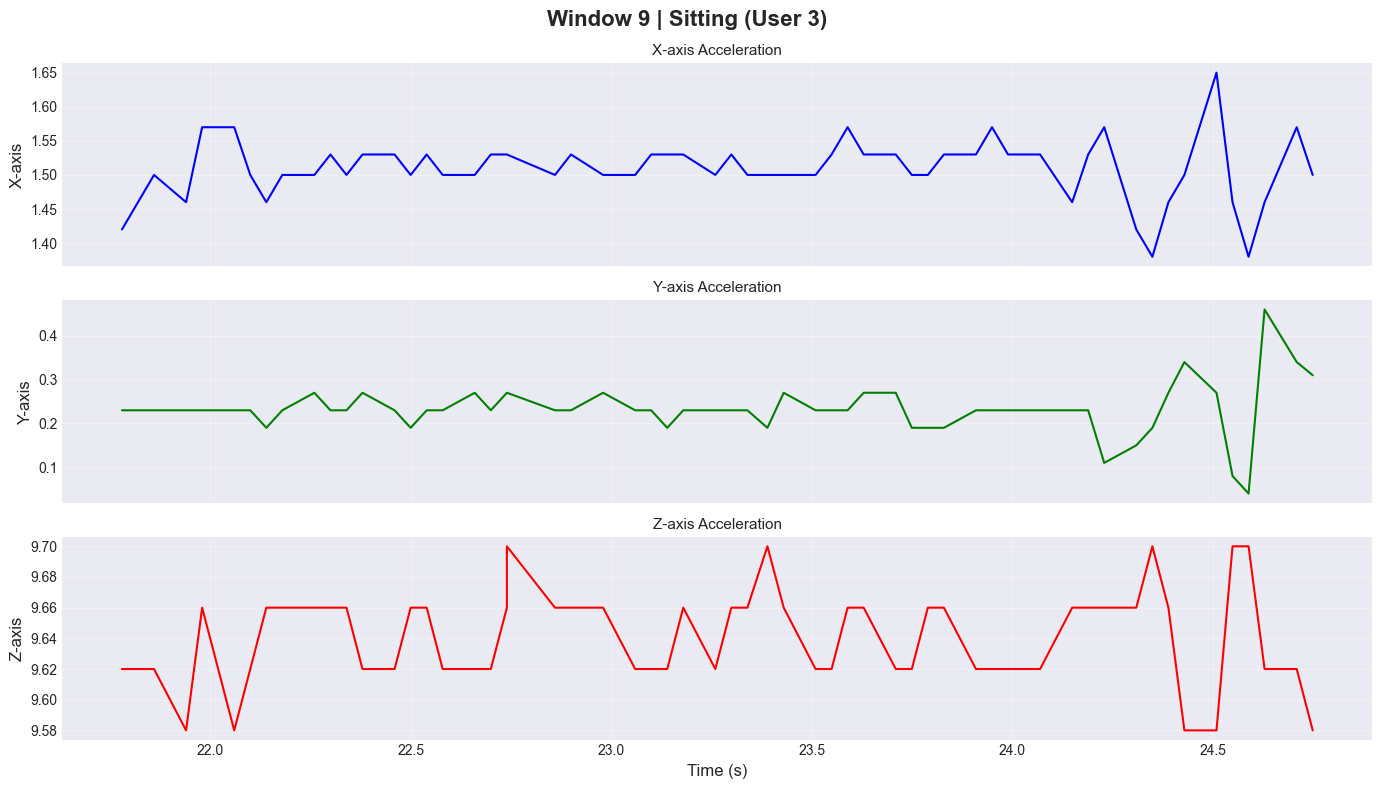

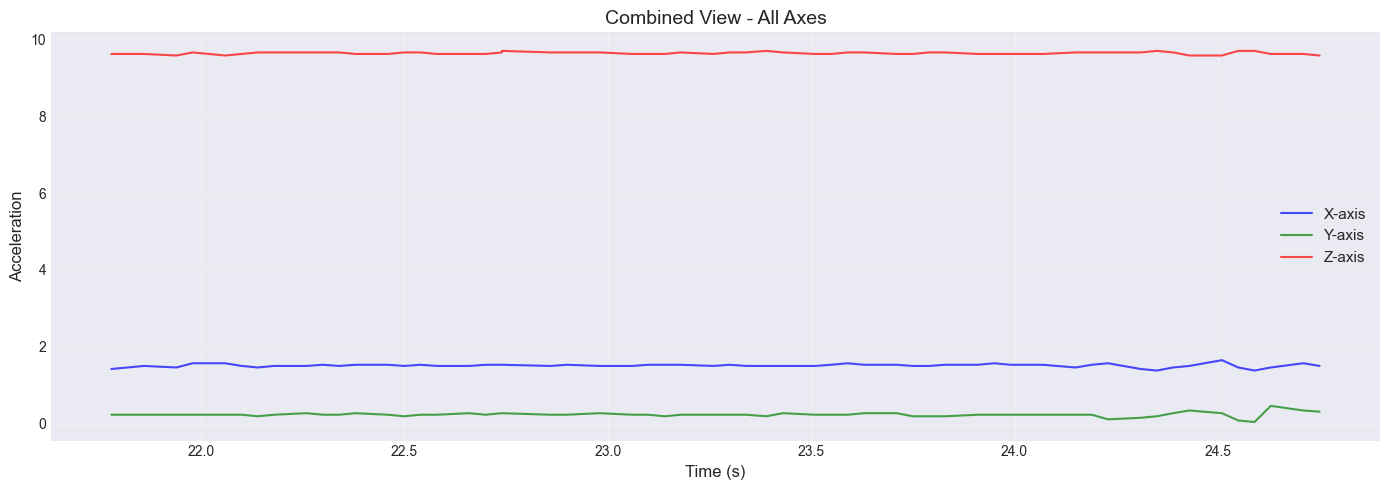


📊 Window Info:
  User: 3 | Activity: Sitting
  Time: 21.75s → 24.75s
  Duration: 3.00s
  Samples: 60 readings

🏷️  Your labels: Periodicity=___, Stability=___, Coordination=___


In [23]:
plot_window(9, df_windows, df_sensor)

## 📊 My Labels (from iteration1 data)
```
Periodicity:        0.0
Temporal Stability: 1.0
Coordination:       0.5
```

## 💭 Reasoning

**Periodicity (0.0)**: No repeating pattern. Mostly flat signal with small fluctuations from breathing/adjustments.

**Temporal Stability (1.0)**: Very low variance. Signal stays near gravity (~9.8 m/s²) with minimal deviation throughout.

**Coordination (0.5)**: Small movements show some multi-axis correlation, but not rhythmic coordination.

### 🔍 Note
**STABILITY ANCHOR**: Use this as reference for high (1.0) stability.

---

# Example 4: Standing (Window 12, User 3)

**⚠️ Label this window BEFORE reading the reasoning below!**

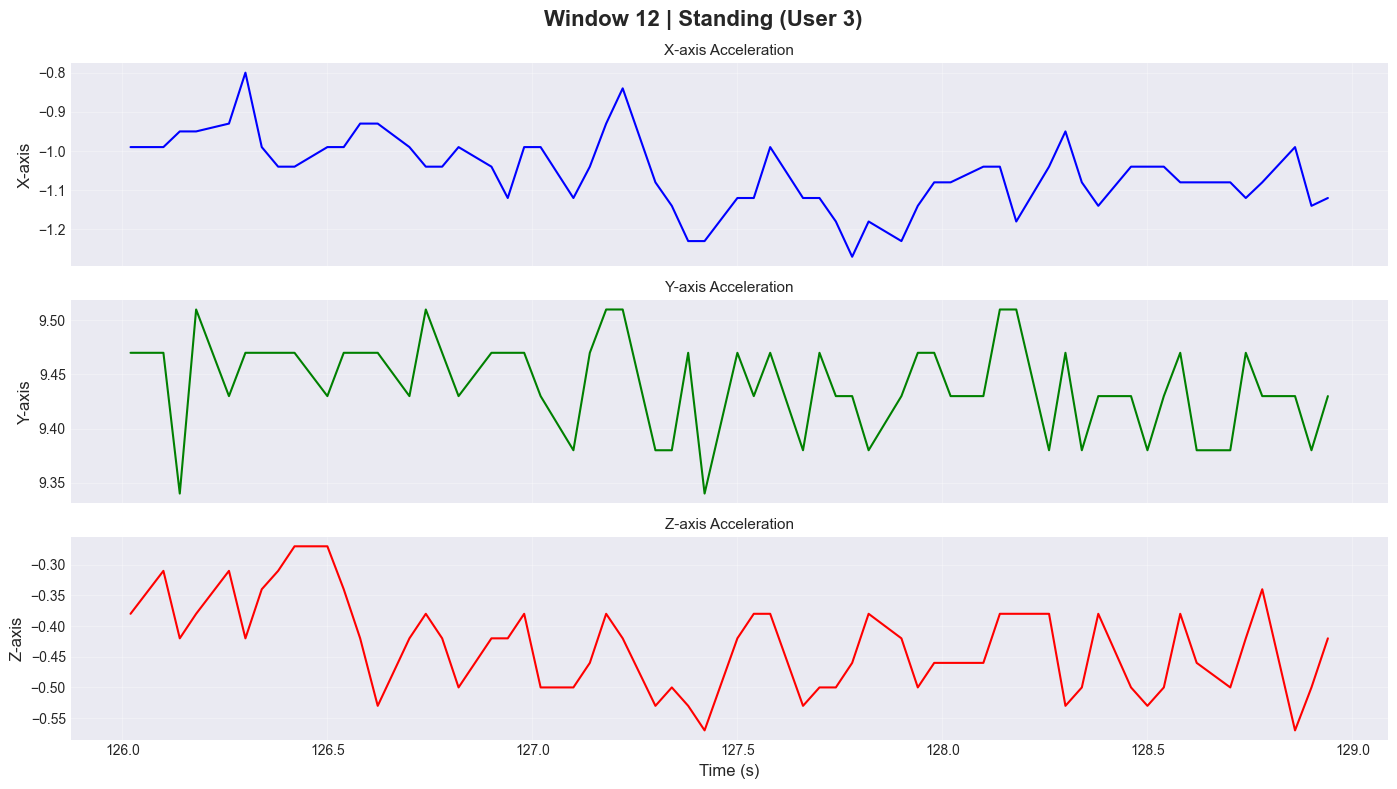

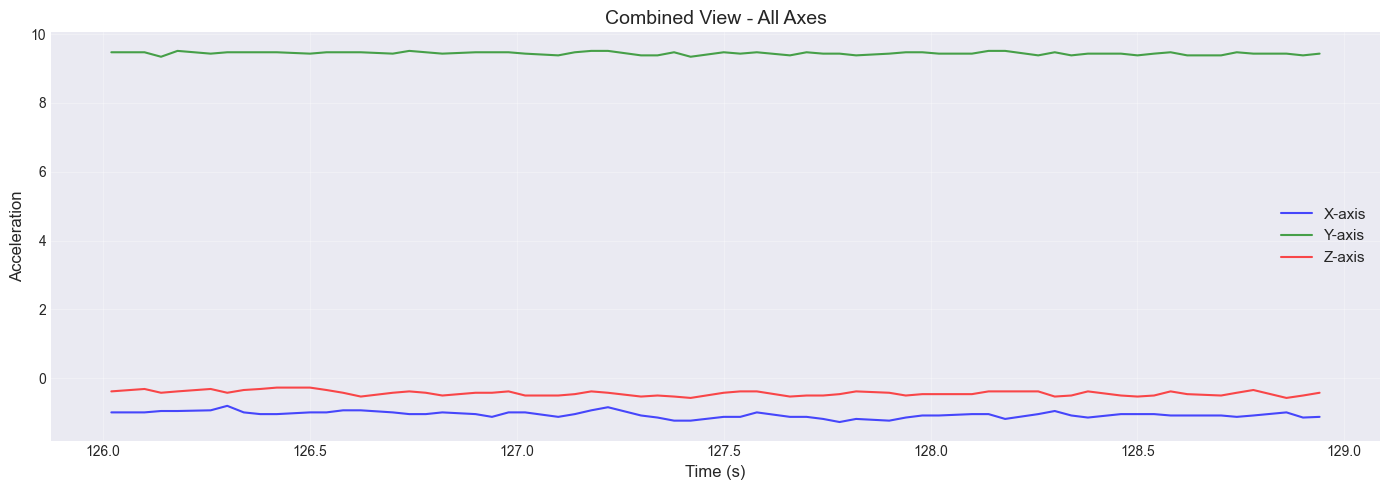


📊 Window Info:
  User: 3 | Activity: Standing
  Time: 126.00s → 129.00s
  Duration: 3.00s
  Samples: 59 readings

🏷️  Your labels: Periodicity=___, Stability=___, Coordination=___


In [18]:
plot_window(12, df_windows, df_sensor)

## 📊 My Labels (from iteration1 data)
```
Periodicity:        0.0
Temporal Stability: 1.0
Coordination:       0.5
```

## 💭 Reasoning

**Periodicity (0.0)**: Essentially flat. Std dev < 0.1 (sensor noise level). No cycles.

**Temporal Stability (1.0)**: MAXIMUM stability. Even flatter than sitting. Range < 0.5 m/s² on all axes.

**Coordination (0.5)**: Postural micro-corrections for balance involve multiple axes minimally.

### 🔍 Note
**ULTIMATE ANCHOR**: Standing = P=0.0, S=1.0. Compare everything to this!

---

# Example 5: Upstairs (Window 18, User 3)

**⚠️ Label this window BEFORE reading the reasoning below!**

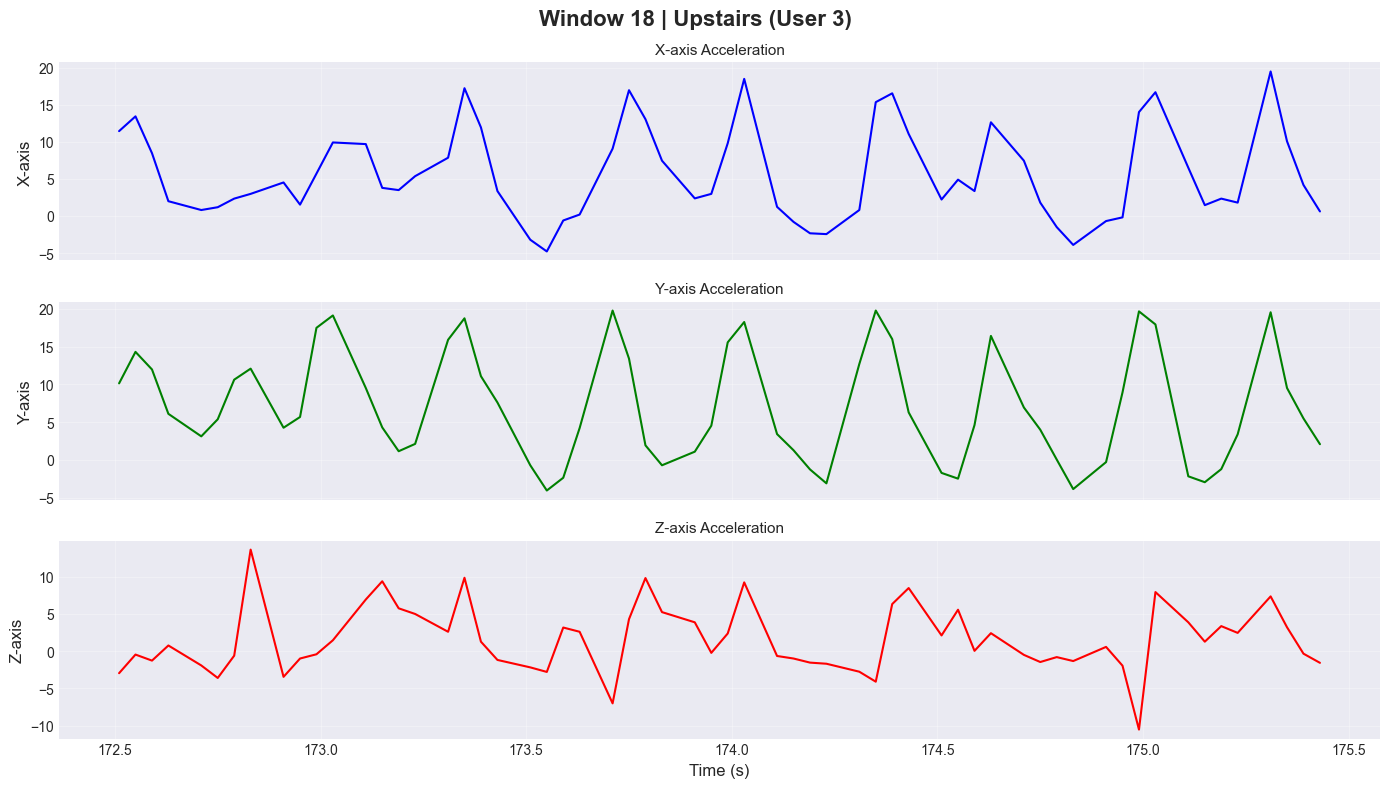

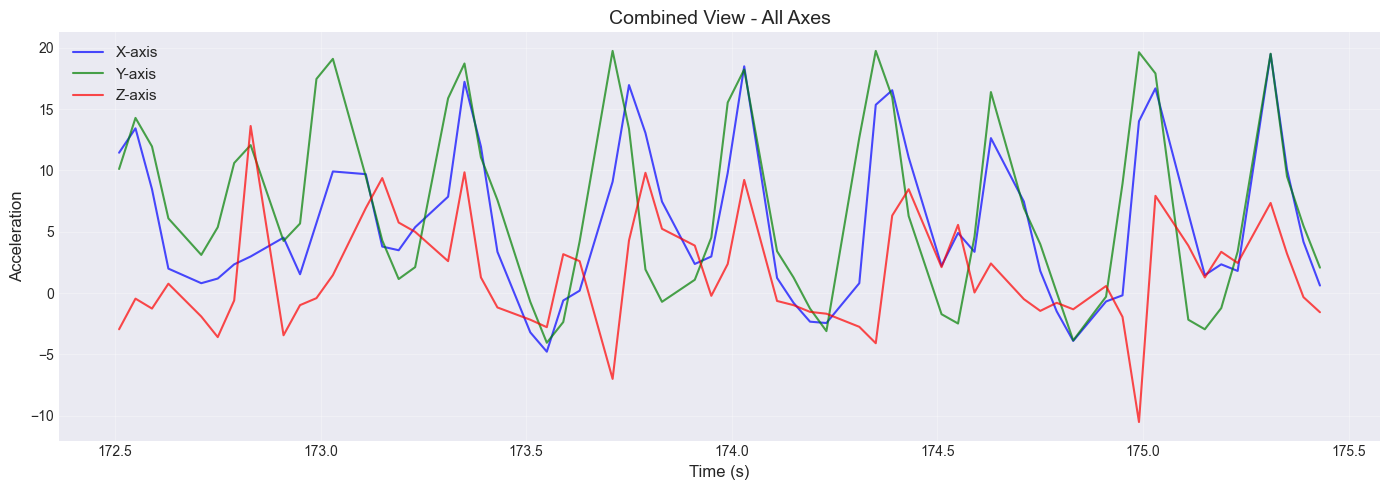


📊 Window Info:
  User: 3 | Activity: Upstairs
  Time: 172.50s → 175.50s
  Duration: 3.00s
  Samples: 60 readings

🏷️  Your labels: Periodicity=___, Stability=___, Coordination=___


In [19]:
plot_window(18, df_windows, df_sensor)

## 📊 My Labels (from iteration1 data)
```
Periodicity:        1.0
Temporal Stability: 0.5
Coordination:       1.0
```

## 💭 Reasoning

**Periodicity (1.0)**: Distinct stair steps (~2-3 in 3s). Each step has similar profile, evenly spaced.

**Temporal Stability (0.5)**: Large accelerations per step, but overall envelope is consistent (steady climbing).

**Coordination (1.0)**: Stair climbing requires leg push + core + arm swing. All axes move together.

### 🔍 Note
Similar to jogging (periodic + coordinated) but MORE stable due to constrained rhythm.

---

# Example 6: Downstairs (Window 20, User 3)

**⚠️ Label this window BEFORE reading the reasoning below!**

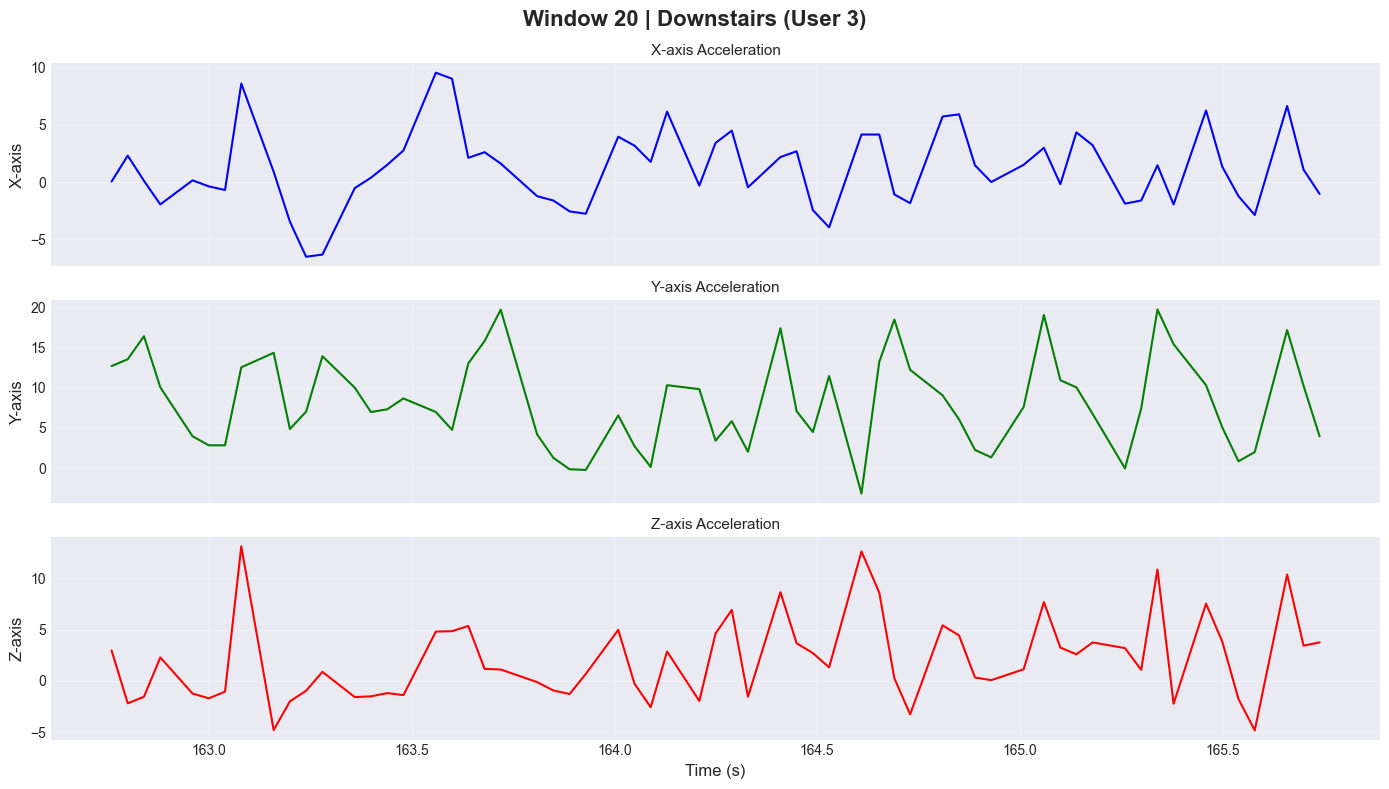

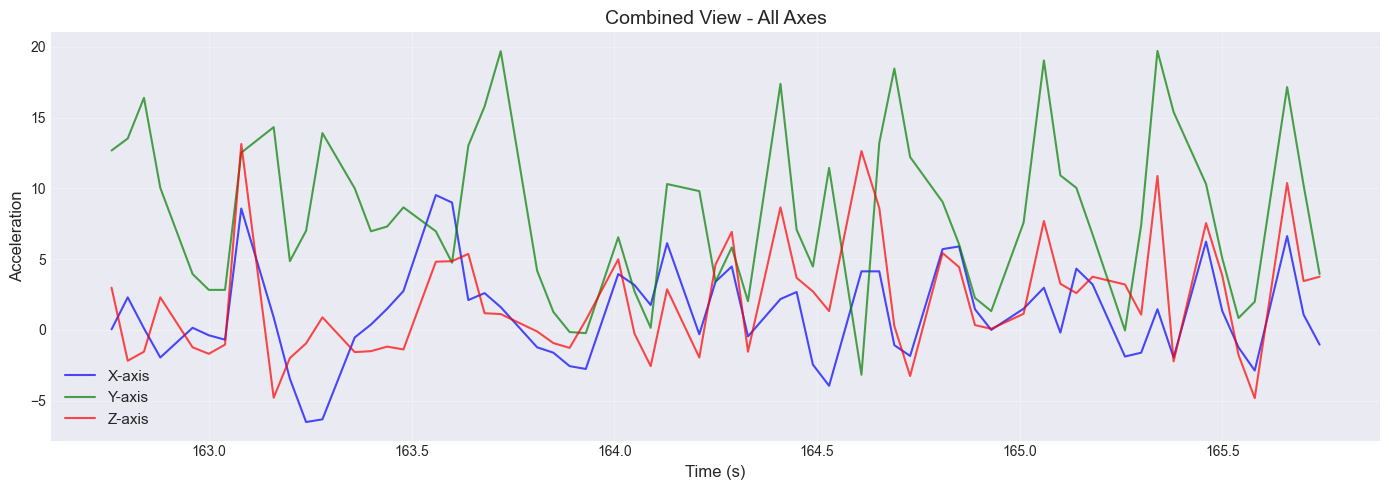


📊 Window Info:
  User: 3 | Activity: Downstairs
  Time: 162.75s → 165.75s
  Duration: 3.00s
  Samples: 61 readings

🏷️  Your labels: Periodicity=___, Stability=___, Coordination=___


In [20]:
plot_window(20, df_windows, df_sensor)

## 📊 My Labels (from iteration1 data)
```
Periodicity:        0.5
Temporal Stability: 0.0
Coordination:       0.5
```

## 💭 Reasoning

**Periodicity (0.5)**: Step-like but irregular. People vary timing/technique when controlling descent.

**Temporal Stability (0.0)**: "Controlled falling" with rapid accelerations/braking. High variability.

**Coordination (0.5)**: Y-axis (landing) clear, but X/Z less synchronized. More corrections than upstairs.

### 🔍 Note
**CRITICAL**: Upstairs vs Downstairs = SAME activity type, DIFFERENT concepts!

---

# Example 7: Walking (Window 25, User 5)

**⚠️ Label this window BEFORE reading the reasoning below!**

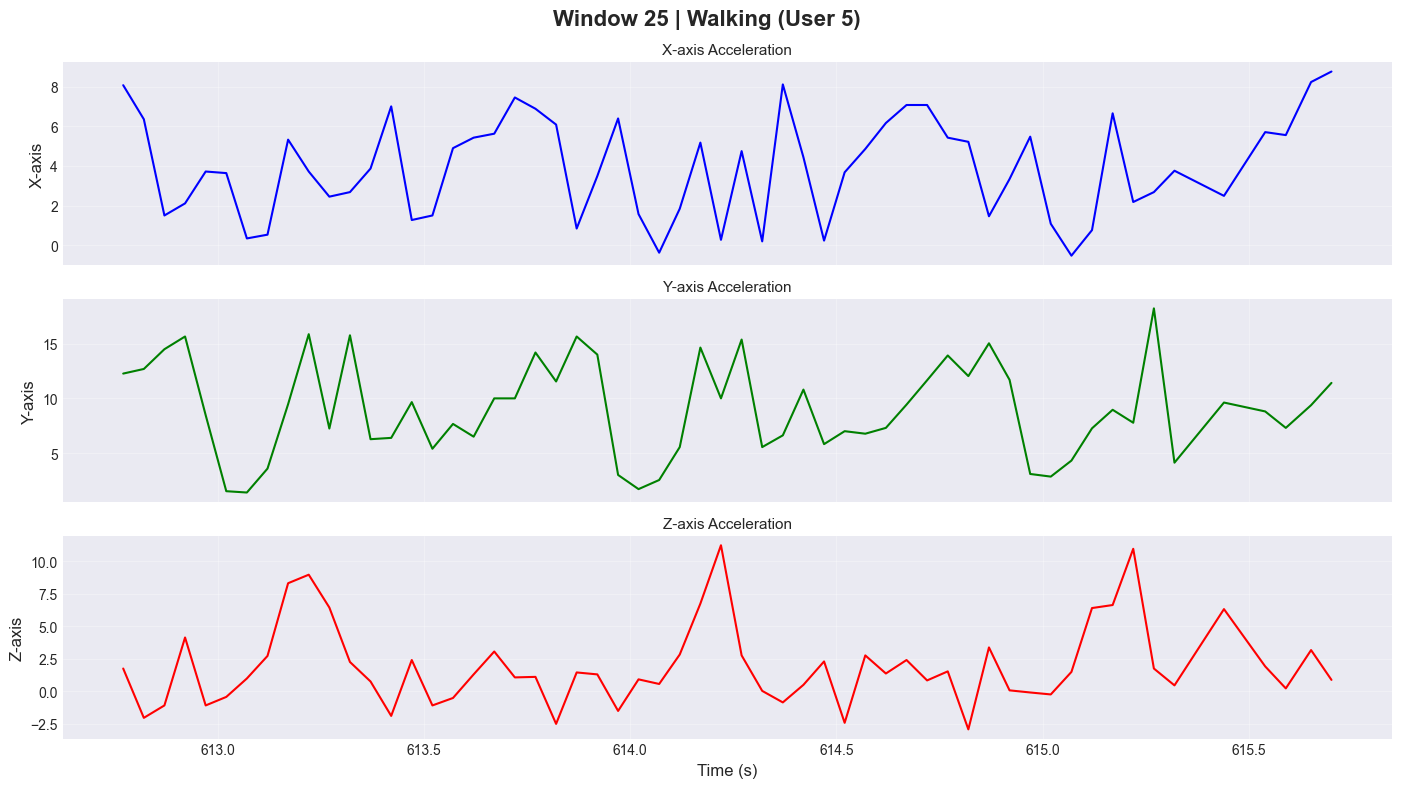

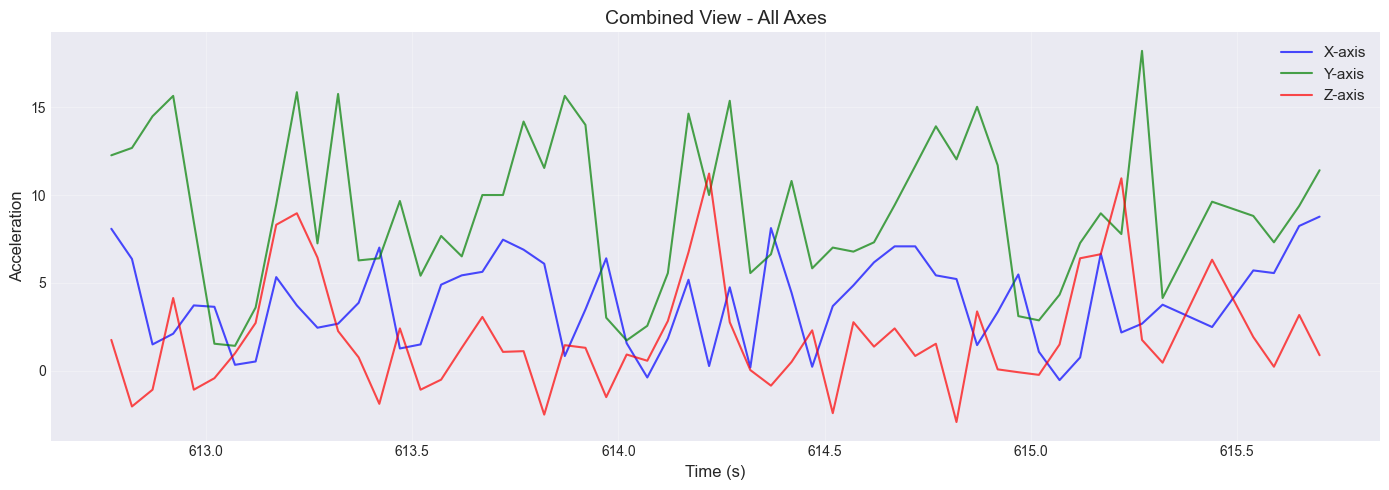


📊 Window Info:
  User: 5 | Activity: Walking
  Time: 612.75s → 615.75s
  Duration: 3.00s
  Samples: 60 readings

🏷️  Your labels: Periodicity=___, Stability=___, Coordination=___


In [21]:
plot_window(25, df_windows, df_sensor)

## 📊 My Labels (from iteration1 data)
```
Periodicity:        0.5
Temporal Stability: 0.5
Coordination:       0.0
```

## 💭 Reasoning

**Periodicity (0.5)**: Similar to Window 0: ~2 cycles with some variability.

**Temporal Stability (0.5)**: Moderate oscillations within consistent envelope.

**Coordination (0.0)**: Axes appear more independent. User 5's style, phone placement, or surface differ.

### 🔍 Note
**SAME ACTIVITY (Walking), DIFFERENT COORDINATION**: Shows individual differences!

---

# Example 8: Walking (Window 1, User 3)

**⚠️ Label this window BEFORE reading the reasoning below!**

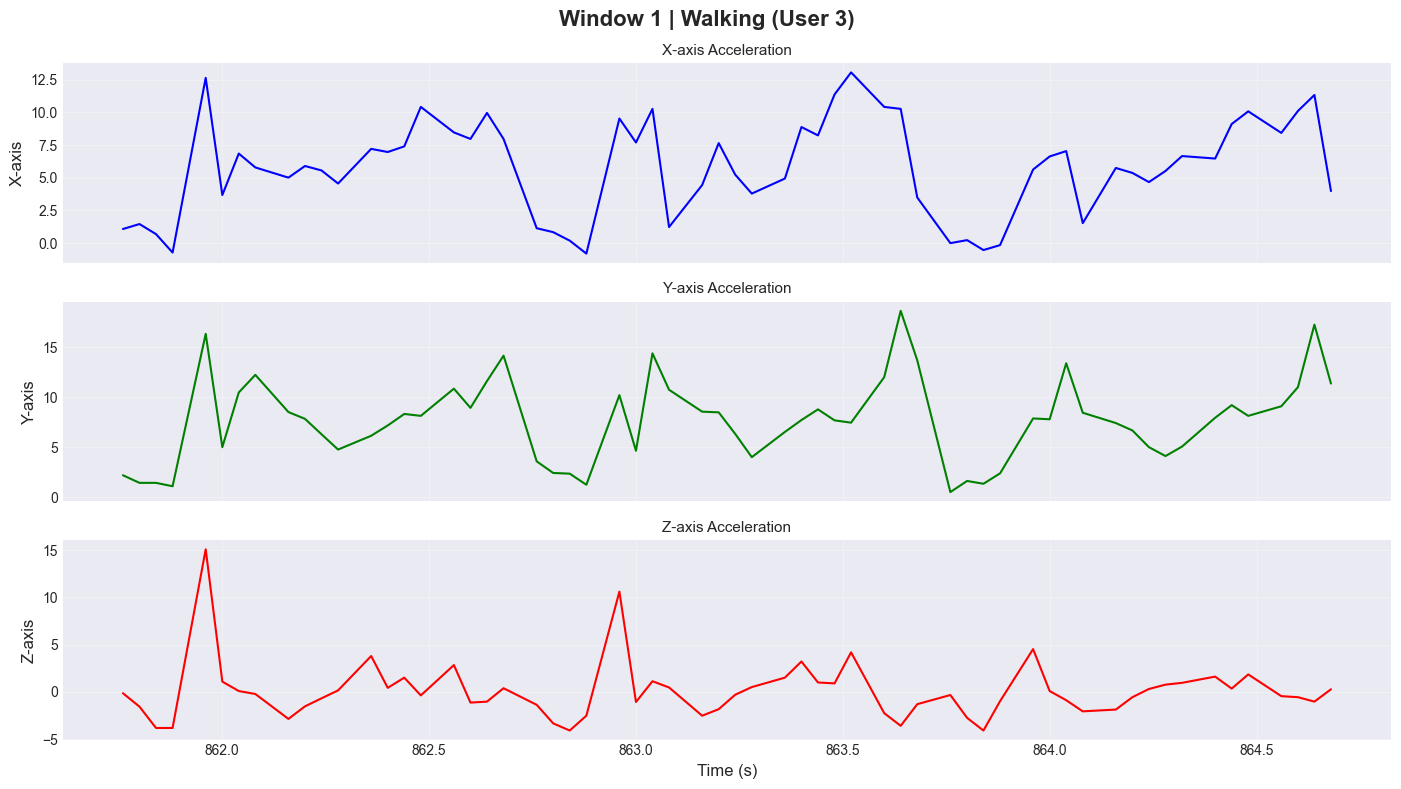

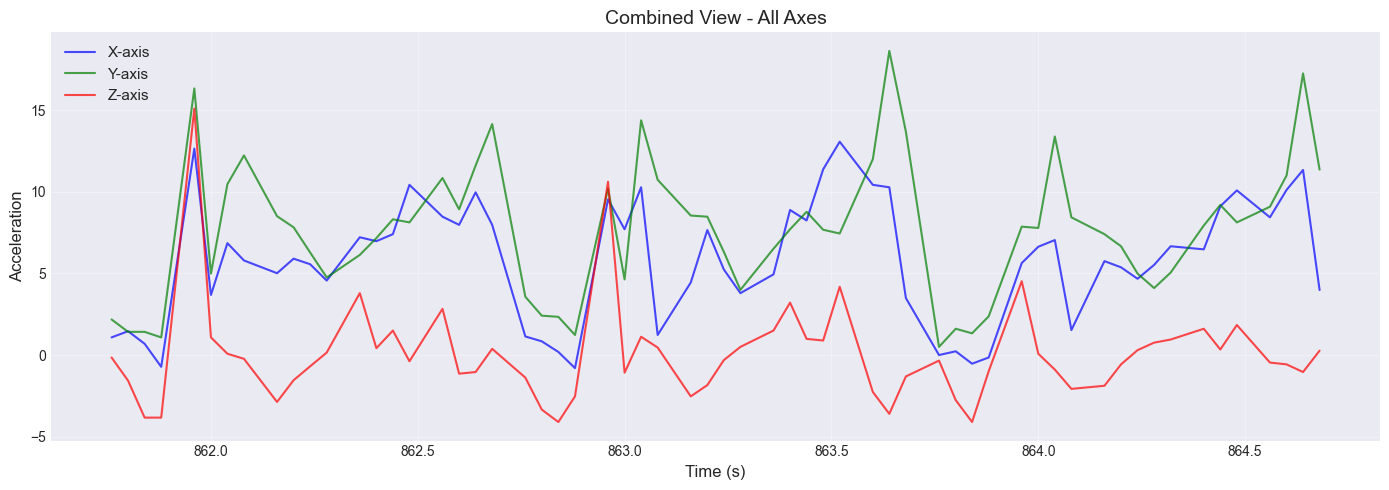


📊 Window Info:
  User: 3 | Activity: Walking
  Time: 861.75s → 864.75s
  Duration: 3.00s
  Samples: 60 readings

🏷️  Your labels: Periodicity=___, Stability=___, Coordination=___


In [22]:
plot_window(1, df_windows, df_sensor)

## 📊 My Labels (from iteration1 data)
```
Periodicity:        1.0
Temporal Stability: 0.5
Coordination:       1.0
```

## 💭 Reasoning

**Periodicity (1.0)**: MUCH clearer pattern than Windows 0 or 25. Strong, consistent cycles.

**Temporal Stability (0.5)**: Regular oscillations similar to other walking.

**Coordination (1.0)**: All axes show strong coordinated engagement. Well-synchronized peaks.

### 🔍 Note
**VIGOROUS WALKING**: THREE walking examples (0, 25, 1) with THREE different profiles!

---

# Summary & Action Plan

## Key Insights
1. **Activity ≠ Concepts**: THREE walking windows (0, 25, 1) have different labels!
2. **Independence**: Jogging = P=1.0, S=0.0 (periodic but unstable)
3. **Edge Cases**: Sitting/Standing coordination, Walking periodicity thresholds

## Calibration Steps
1. ☐ Each person independently labels these 8 windows
2. ☐ Calculate Cohen's Kappa (target >0.75)
3. ☐ Discuss ALL disagreements
4. ☐ Update guidelines, re-label until >0.80
5. ☐ Label remaining 92 windows consistently

**Goal**: 100 consistently labeled windows → 68-75% model accuracy! 🚀